# Missing Values
- Data entry errors
- System errors
- Survey non-response
- Data merging issues

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import fetch_openml
churn_data = fetch_openml(name="Telco-Customer-Churn", version=1, as_frame=True)
df = churn_data.frame

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## Inspection

In [11]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


## Visualization

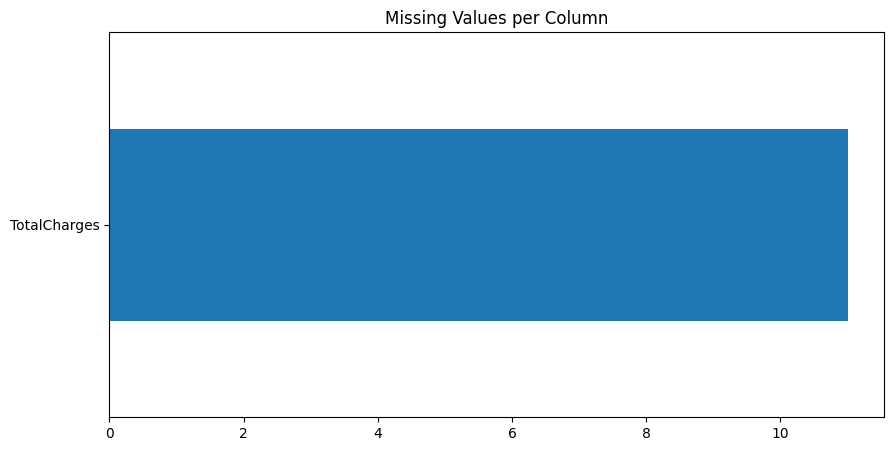

In [12]:
missing = df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(10,5))
missing.sort_values().plot(kind='barh')
plt.title("Missing Values per Column")
plt.show()

Missing as a percent, too high - better to drop

In [13]:
missing_percent = (df.isnull().sum()/len(df))*100
missing_percent[missing_percent > 0]

,0
TotalCharges,0.156183


### Heatmap

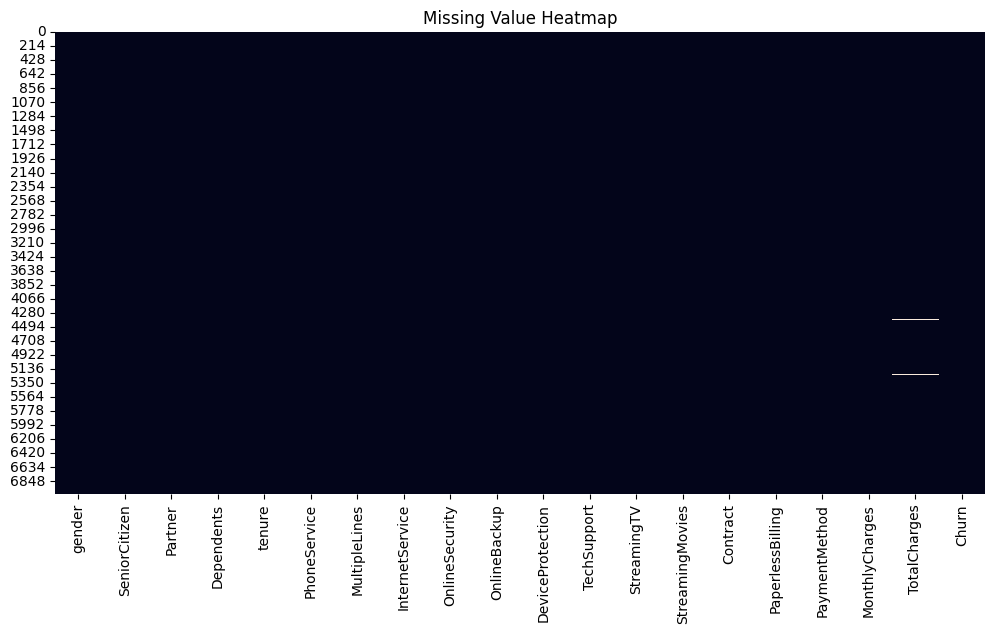

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

- < 5%	Simple imputation
- 5–20%	Advanced imputation
- 20–40%	Evaluate importance
- `>50%	Consider dropping

In [25]:
df_mean = df.copy()
df_mean['TotalCharges'].fillna(df_mean['TotalCharges'].mean(), inplace=True)

/tmp/ipython-input-2125022414.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['TotalCharges'].fillna(df_mean['TotalCharges'].mean(), inplace=True)


In [17]:
df_median = df.copy()
df_median['TotalCharges'].fillna(df_median['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-735976955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median['TotalCharges'].fillna(df_median['TotalCharges'].median(), inplace=True)


In [18]:
df_mode = df.copy()
df_mode['TotalCharges'].fillna(df_mode['TotalCharges'].mode()[0], inplace=True)

/tmp/ipython-input-4288526249.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode['TotalCharges'].fillna(df_mode['TotalCharges'].mode()[0], inplace=True)


For Categorical (Mode)

In [20]:
df['MultipleLines'].fillna(df['MultipleLines'].mode()[0], inplace=True)


/tmp/ipython-input-716544756.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MultipleLines'].fillna(df['MultipleLines'].mode()[0], inplace=True)


### Sklearn SimpleImputer

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

### KNN Imputor

In [23]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df_knn = df.copy()

numerical_cols = df_knn.select_dtypes(include=np.number).columns
df_knn[numerical_cols] = knn_imputer.fit_transform(df_knn[numerical_cols])

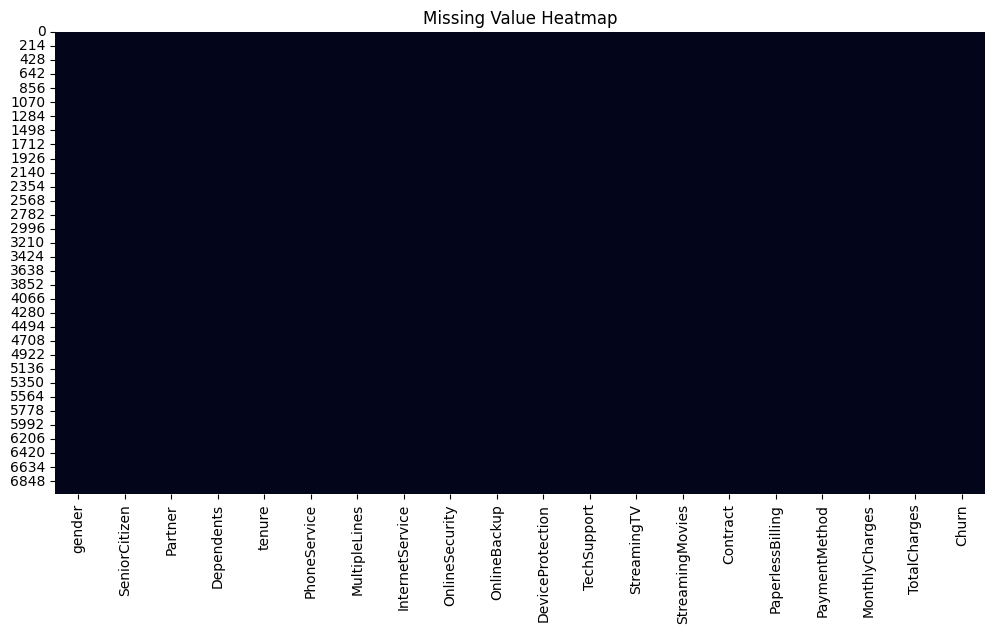

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(df_knn.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()